![Astrofisica Computacional](../logo.PNG)

---
## 01. Function Interpolation


Eduard Larrañaga (ealarranaga@unal.edu.co)

---

### Summary

In this notebook some of the interpolation techniques of a function are presented.

---

## interpolation

Astrophysical data (experimental and synthetic) usually consist of a set of discrete values ​​of the form $(x_j, f_j)$ where the value of a function $f(x)$ is represented for a finite set of arguments $\{ x_0, x_1, x_2, ..., x_{n} \}$. However, on many occasions it is necessary to know the value of the function at additional points (which do not belong to the given set). **Interpolation** is the method used to obtain these values.

By **interpolation** we will understand defining a function $g(x)$, using the known discrete information and in such a way that $g(x_j) = f(x_j)$ and that the value of the function $f is approximated $ at any point $x \in [x_{min}, x_{max}]$, where $x_{min} = \min [x_j]$ and $x_{max} = \max \{ x_j \}$.

On the other hand, the **extrapolation** would correspond to approximating the value of the function $f$ at a point $x \notin [x_{min}, x_{max}]$}. However, this case will not be analyzed here.
 
---
## Simple Linear Interpolation

The simplest interpolation method is called **Polynomial Interpolation** and consists of finding a polynomial $p_n(x)$ of degree $n$ that passes through $N = n+1$ points $x_j$ taking the values ​​$p (x_j) = f(x_j)$, where $j=0,1,2,...,n$.

The polynomial is written in the general form

$p_n(x) = a_0 + a_1 x + a_2 x^2 + \cdots + a_n x^n$

where $a_i$ are $n+1$-real constants to be determined by the conditions

$\left(
\begin{array}{ccccc}
1&x_0^1&x_0^2&\cdots&x_0^n\\
\vdots&\vdots&\vdots&\vdots&\vdots\\
\vdots&\vdots&\vdots&\vdots&\vdots\\
1&x_n^1&x_n^2&\cdots&x_n^n\\
\end{array}
\right)
\left(\begin{array}{c}
a_0\\
\vdots\\
\vdots\\
a_n
\end{array}\right)
=
\left(\begin{array}{c}
f(x_0)\\
\vdots\\
\vdots\\
f(x_n)
\end{array}\right)$

The solution of this system is easy to obtain in the linear ($n=1$) and quadratic ($n=2$) interpolation cases, but it can be difficult to find for a large value of $n$.

---
### Linear Interpolation

Linear interpolation ($n=1$) of a function $f(x)$ on an interval
$[x_i,x_{i+1}]$ requires knowing only two points.

Solving the resulting linear system gives the interpolated polynomial

\begin{equation}
p_1(x) = f(x_i) + \frac{f(x_{i+1}) - f(x_i)}{x_{i+1} - x_i} (x-x_i) + \mathcal{O}( \Deltax^2)
\end{equation}

where $\Delta x = x_{i+1} - x_i$.

The linear interpolation method provides a polynomial with second-order precision that can be derived once, but this derivative is not continuous at the endpoints of the interpolation interval, $x_i$ and $x_{i+1}$.

#### Example. Linear interpolation by intervals

Next, a set of data will be read from a .txt file and linearly interpolated between each pair of points (*piecewise interpolation*)

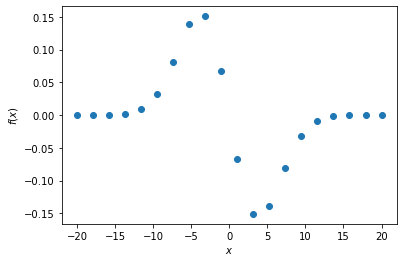

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Reading the data
data = np.loadtxt('data_points.txt', comments='#', delimiter=',')
x = data[:,0]
f = data[:,1]

plt.figure()
plt.scatter(x,f)
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.show()

In [2]:
data.shape

(20, 2)

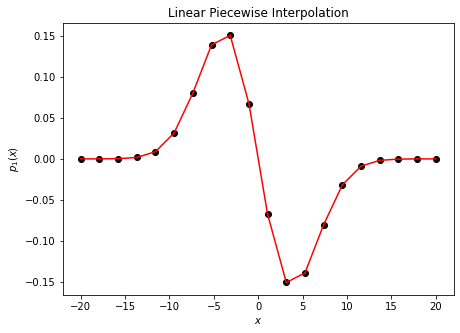

In [3]:
def linearInterpolation(x1, x2, f1, f2, x):
    p1 = f1 + ((f2-f1)/(x2-x1))*(x-x1)
    return p1
    
N = len(x)

plt.figure(figsize=(7,5))
plt.scatter(x, f, color='black')

for i in range(N-1):
    x_interval = np.linspace(x[i],x[i+1],3) 
    # Note that the number 3 in thie above line indeicates the number of 
    # points interpolated in each interval !
    # (including the extreme points of the interval)
    y_interval = linearInterpolation(x[i], x[i+1], f[i], f[i+1], x_interval)
    plt.plot(x_interval, y_interval,'r')
    
plt.title(r'Linear Piecewise Interpolation')
plt.xlabel(r'$x$')
plt.ylabel(r'$p_1(x)$')
plt.show()

---
### Quadratic Interpolation

Quadratic interpolation ($n=2$) requires information from three points.

For example, we can take the three points $x_i$ , $x_{i+1}$ and $x_{i+2}$ to interpolate the function $f(x)$ in the range$[x_{i}, x_{i+1}]$. Solving the corresponding system of linear equations gives the polynomial

$p_2(x) = \frac{(x-x_{i+1})(x-x_{i+2})}{(x_i - x_{i+1})(x_i - x_{i+2} )} f(x_i)
+ \frac{(x-x_{i})(x-x_{i+2})}{(x_{i+1} - x_{i})(x_{i+1} - x_{i+2 })} f(x_{i+1})
+ \frac{(x-x_i)(x-x_{i+1})}{(x_{i+2} - x_i)(x_{i+2} - x_{i+1})} f(x_ {i+2}) + \mathcal{O}(\Delta x^3)$,

where $\Delta x = \max \{ x_{i+2}-x_{i+1},x_{i+1}-x_i \}$.

In this case, the interpolated polynomial can be differentiated twice, but although its first derivative is continuous, the second derivative is not continuous at the endpoints of the interval.

#### Example. Quadratic Interpolation by Intervals

Next, a data set will be read from a .txt file and quadratically interpolated in sub-intervals (*quadratic piecewise interpolation*)

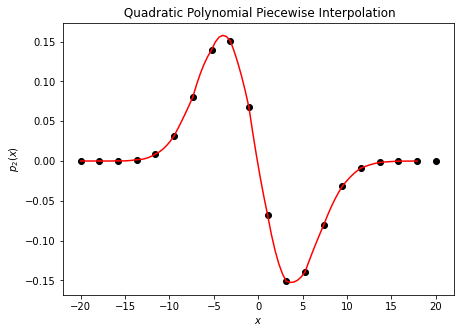

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Reading the data
data = np.loadtxt('data_points.txt', comments='#', delimiter=',')
x = data[:,0]
f = data[:,1]

def quadraticInterpolation(x1, x2, x3, f1, f2, f3, x):
    p2 = (((x-x2)*(x-x3))/((x1-x2)*(x1-x3)))*f1 +\
    (((x-x1)*(x-x3))/((x2-x1)*(x2-x3)))*f2 +\
    (((x-x1)*(x-x2))/((x3-x1)*(x3-x2)))*f3
    return p2
    
N = len(x)

plt.figure(figsize=(7,5))
plt.scatter(x, f, color='black')

for i in range(N-2):
    x_interval = np.linspace(x[i],x[i+1],6) # 6 interpolate points in each interval
    y_interval = quadraticInterpolation(x[i], x[i+1], x[i+2], f[i], f[i+1], f[i+2], x_interval)
    plt.plot(x_interval, y_interval,'r')

plt.title(r' Quadratic Polynomial Piecewise Interpolation')
plt.xlabel(r'$x$')
plt.ylabel(r'$p_2(x)$')
plt.show()

**Note:** Due to the way of performing the quadratic interpolation, the last interval is left without information. In this region the interpolation of the penultimate interval can be extended or a linear polynomial can also be interpolated.

---
## Lagrange interpolation

**Lagrange Interpolation** also finds a polynomial of degree $n$ using $n+1$ points, but uses an alternative method of finding the coefficients. To understand this idea, we rewrite the linear polynomial found earlier in the form

\begin{equation}
p_1(x) = \frac{x-x_{i+1}}{x_i - x_{i+1}} f(x_i) + \frac{x-x_i}{x_{i+1}-x_i} f (x_{i+1}) + \mathcal{O}(\Delta x^2),
\end{equation}

or this way,

\begin{equation}
p_1(x) = \sum_{j=i}^{i+1} f(x_j) L_{1j}(x) + \mathcal{O}(\Delta x^2)
\end{equation}

where the *Lagrange coefficients* have been introduced

\begin{equation}
L_{1j}(x) = \frac{x-x_k}{x_j-x_k}\bigg|_{k\ne j}.
\end{equation}

Note that these coefficients ensure that the polynomial passes through the known points, i.e. $p_1(x_i) = f(x_i)$ and $p_1(x_{i+1}) = f(x_{i+1})$

The **Lagrange interpolation** generalizes these expressions to a polynomial of degree $n$ passing through the $n+1$ known points,

\begin{equation}
p_n (x) = \sum_{j=0}^{n} f(x_j) L_{nj}(x) + \mathcal{O}(\Delta x^{n+1})\,, \label{ eq:LagrangeInterpolation}
\end{equation}

where the Lagrange coefficients generalize to

\begin{equation}
L_{nj}(x) = \prod_{k\ne j}^{n} \frac{x-x_k}{x_j - x_k}\,.
\end{equation}

Again, it is possible to notice that these coefficients ensure that the polynomial passes through the known points $p(x_j) = f(x_j)$.

In [5]:
# %load lagrangeInterpolation
'''
Eduard Larrañaga
Computational Astrophysics 
2020

Lagrange Interpolation Method
'''

import numpy as np

#Lagrange Coefficients
def L(x, xi, j):
	'''
	------------------------------------------
	L(x, xi, j)
	------------------------------------------
    Returns the Lagrange coefficient for the 
    interpolation evaluated at points x
    Receives as arguments:
    x : array of points where the interpolated
    polynomial will be evaluated
    xi : array of N data points 
    j : index of the coefficient to be 
    calculated
	------------------------------------------
	'''
	# Number of points
	N = len(xi) 

	prod = 1
	for k in range(N):
		if (k != j):
			prod = prod * (x - xi[k])/(xi[j] - xi[k])
	return prod





# Interpolated Polynomial
def p(x, xi, fi):
	'''
	------------------------------------------
    p(x, xi, fi)
    ------------------------------------------
    Returns the values of the Lagrange 
    interpolated polynomial in a set of points
    defined by x
    x : array of points where the interpolated
    polynomial will be evaluated
    xi : array of N data points points
    fi : values of the function to be 
    interpolated
    ------------------------------------------
	'''
	# Number of points
	N = len(xi)

	summ = 0
	for j in range(N):
		summ = summ + fi[j]*L(x, xi, j)
	return summ


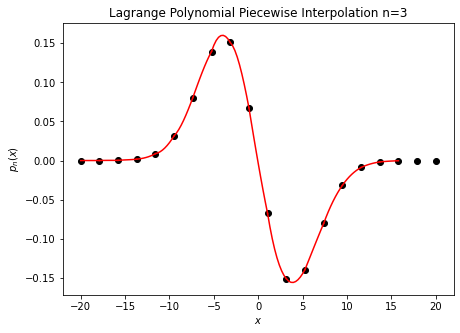

In [10]:
import numpy as np
import matplotlib.pyplot as plt
#import lagrangeInterpolation as lagi
import sys

# Reading the data
data = np.loadtxt('data_points.txt', comments='#', delimiter=',')
x = data[:,0]
f = data[:,1]
    
N = len(x)

# Degree of the polynomial to be interpolated piecewise
n = 3

# Check if the number of point is enough to interpolate such a polynomial
if n>=N:
    print('\nThere are not enough points to interpolate this polynomial.')
    print(f'Using {N:.0f} points it is possible to interpolate polynomials up to order n={N-1:.0f}')
    sys.exit()

    
plt.figure(figsize=(7,5))
plt.title(f'Lagrange Polynomial Piecewise Interpolation n={n:.0f}')
plt.scatter(x, f, color='black')

# Piecewise Interpolation Loop
for i in range(N-n):
    xi = x[i:i+n+1]
    fi = f[i:i+n+1]
    x_interval = np.linspace(x[i],x[i+1],3*n)
    y_interval = p(x_interval,xi,fi)
    plt.plot(x_interval, y_interval,'r')

plt.xlabel(r'$x$')
plt.ylabel(r'$p_n(x)$')
plt.show()

Note that the last $n$ points are not interpolated. What can be done?

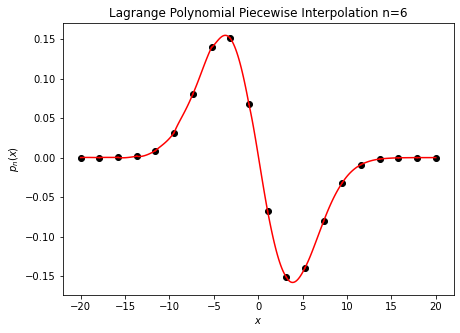

In [12]:
import numpy as np
import matplotlib.pyplot as plt
#import lagrangeInterpolation as lagi
import sys

# Reading the data
data = np.loadtxt('data_points.txt', comments='#', delimiter=',')
x = data[:,0]
f = data[:,1]
    
N = len(x)

# Degree of the polynomial to be interpolated piecewise
n = 6

# Check if the number of point is enough to interpolate such a polynomial
if n>=N:
    print('\nThere are not enough points to interpolate this polynomial.')
    print(f'Using {N:.0f} points it is possible to interpolate polynomials up to order n={N-1:.0f}')
    sys.exit()

    
plt.figure(figsize=(7,5))
plt.title(f'Lagrange Polynomial Piecewise Interpolation n={n:.0f}')
plt.scatter(x, f, color='black')

# Piecewise Interpolation Loop
for i in range(N-n):
    xi = x[i:i+n+1]
    fi = f[i:i+n+1]
    x_interval = np.linspace(x[i],x[i+1],3*n)
    y_interval = p(x_interval,xi,fi)
    plt.plot(x_interval, y_interval,'r')

# Piecewise Interpolation for the final N-n points, 
# using a lower degree polynomial
while n>1:
    m = n-1
    for i in range(N-n,N-m):
        xi = x[i:i+m+1]
        fi = f[i:i+m+1]
        x_interval = np.linspace(x[i],x[i+1],3*m)
        y_interval = p(x_interval,xi,fi)
        plt.plot(x_interval, y_interval,'r')
    n=n-1


plt.xlabel(r'$x$')
plt.ylabel(r'$p_n(x)$')
plt.show()

### Runge's phenomenon

Why is it interpolated by sub-intervals? When you have a large number of known points, it is possible to interpolate a high degree polynomial. However, the behavior of the interpolated polynomial may not be as expected (especially at the ends of the interpolation interval) due to the existence of uncontrolled oscillations. This behavior is called the Runge phenomenon.

For example, for a data set with $20$ points it is possible to interpolate a polynomial of order $n=19$,

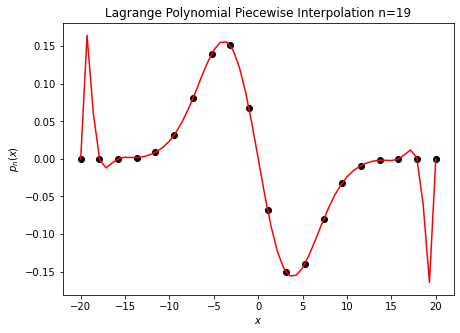

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import lagrangeInterpolation as lagi
import sys

# Reading the data
data = np.loadtxt('data_points.txt', comments='#', delimiter=',')
x = data[:,0]
f = data[:,1]
    
N = len(x)

# Higher Degree polynomial to be interpolated 
n = N-1

plt.figure(figsize=(7,5))
plt.title(f'Lagrange Polynomial Piecewise Interpolation n={n:.0f}')
plt.scatter(x, f, color='black')

#Interpolation of the higher degree polynomial
x_int = np.linspace(x[0],x[N-1],3*n)
y_int = lagi.p(x_int,x,f)
plt.plot(x_int, y_int,'r')

plt.xlabel(r'$x$')
plt.ylabel(r'$p_n(x)$')
plt.show()

However, it is clear that the behavior of the interpolated polynomial is not good at the extremes of the considered interval. For this reason, it is highly advisable to use a sub-interval interpolation of small degree polynomials.

---
## Cubic Hermite Interpolation on Intervals

Hermite interpolation is a particular case of polynomial interpolation that uses a set of known points where the value of the function $f(x_j)$ and its derivative $f'(x_j)$ are known. By incorporating the first derivative, high degree polynomials can be interpolated while controlling unwanted oscillations. Additionally, by knowing the first derivative, fewer points are needed to perform the interpolation.

Within this type of interpolation, the most used is that of third-order polynomials. Thus, in an interval $[x_i , x_{i+1}]$, it is required to know (or evaluate) the values ​​of $f(x_i)$, $f(x_{i+1})$, $ f'(x_i)$ and $f'(x_{i+1})$ to obtain the interpolated cubic Hermite polynomial,

\begin{equation}
H_3(x) = f(x_i)\psi_0(z) + f(x_{i+1})\psi_0(1-z)+ f'(x_i)(x_{i+1} - x_{i}) \psi_1(z) - f'(x_{i+1})(x_{i+1}-x_i)\psi_1 (1-z),
\end{equation}

where

\begin{equation}
z = \frac{x-x_i}{x_{i+1}-x_i}
\end{equation}

Y

\begin{align}
\psi_0(z) =&2z^3 - 3z^2 + 1 \\
\psi_1(z) =&z^3-2z^2+z\,\,.
\end{align}

Note that with this formulation, it is possible to interpolate a third-order polynomial on an interval with only two points. In this way, when working with a set of many points, a cubic polynomial could be interpolated between each pair of data, even in the last sub-interval!

In [14]:
# %load HermiteInterpolation
'''
Eduard Larrañaga
Computational Astrophysics 
2020

Hermite Interpolation Method
'''

import numpy as np

#Hermite Coefficients
def psi0(z):
	'''
	------------------------------------------
	psi0(z)
	------------------------------------------
	Returns the Hermite coefficients Psi_0
	for the interpolation
	Receives as arguments: z
	------------------------------------------
	'''
	psi_0 = 2*z**3 - 3*z**2 + 1
	return psi_0

def psi1(z):
	'''
	------------------------------------------
	psi1(z)
	------------------------------------------
	Returns the Hermite coefficients Psi_1 for 
	the interpolation
	Receives as arguments: z
	------------------------------------------
	'''
	psi_1 = z**3 - 2*z**2 + z
	return psi_1


# Interpolated Polynomial
def H3(x, xi, fi, dfidx):
	'''
	------------------------------------------
    H3(x, xi, fi, dfidx)
    ------------------------------------------
    Returns the values of the Cubic Hermite 
    interpolated polynomial in a set of points
    defined by x
    x : array of points where the interpolated
    polynomial will be evaluated
    xi : array of 2 data points 
    fi : array of values of the function at xi
    dfidx : array of values of the derivative 
    of the function at xi
    ------------------------------------------
	'''
	# variable z in the interpolation
	z = (x - xi[0])/(xi[1] - x[0])
	
	h1 = psi0(z) * fi[0]
	h2 = psi0(1-z)*fi[1]
	h3 = psi1(z)*(xi[1] - xi[0])*dfidx[0]
	h4 = psi1(1-z)*(xi[1] - xi[0])*dfidx[1]
	H =  h1 + h2 + h3 - h4
	return H


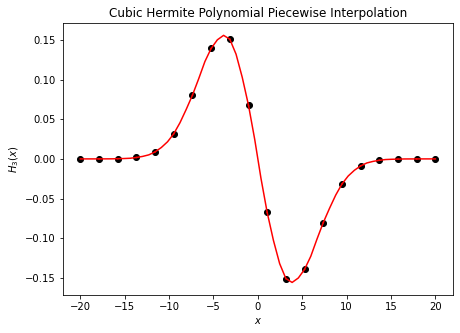

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import HermiteInterpolation as heri

def Derivative(x, f):
    '''
    ------------------------------------------
    Derivative(x, f)
    ------------------------------------------
    This function returns the numerical 
    derivative of a discretely-sample function 
    using one-side derivatives in the extreme 
    points of the interval and second order 
    accurate derivative in the middle points.
    The data points may be evenly or unevenly
    spaced.
    ------------------------------------------
    '''
    # Number of points
    N = len(x)
    dfdx = np.zeros([N, 2])
    dfdx[:,0] = x
    
    # Derivative at the extreme points
    dfdx[0,1] = (f[1] - f[0])/(x[1] - x[0])
    dfdx[N-1,1] = (f[N-1] - f[N-2])/(x[N-1] - x[N-2])
    
    #Derivative at the middle points
    for i in range(1,N-1):
        h1 = x[i] - x[i-1]
        h2 = x[i+1] - x[i]
        dfdx[i,1] = h1*f[i+1]/(h2*(h1+h2)) - (h1-h2)*f[i]/(h1*h2) -\
                    h2*f[i-1]/(h1*(h1+h2))
    
    return dfdx

# Loading the data
data = np.loadtxt('data_points.txt', comments='#', delimiter=',')
x = data[:,0]
f = data[:,1]
N = len(x)

# Calling the derivative function and chosing only the second column
dfdx = Derivative(x,f)[:,1]

plt.figure(figsize=(7,5))
plt.title(f'Cubic Hermite Polynomial Piecewise Interpolation')
plt.scatter(x, f, color='black')

# Piecewise Hermite Interpolation Loop
for i in range(N-1):
    xi = x[i:i+2]
    fi = f[i:i+2]
    dfidx = dfdx[i:i+2]
    x_interval = np.linspace(x[i],x[i+1],4)
    y_interval = heri.H3(x_interval, xi, fi, dfidx)
    plt.plot(x_interval, y_interval,'r')

plt.xlabel(r'$x$')
plt.ylabel(r'$H_3(x)$')
plt.show()
